#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [67]:
import torch 


- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [68]:
X = torch.normal(0, 1, size=(4, 3))
Y = torch.normal(0, 1, size=(4, 3))

concat_row = torch.cat([X,Y], dim=0)
concat_col = torch.cat([X,Y], dim=1)


In [69]:
print('X :\n',X)
print('Y:\n',Y)

print('concat_row:\n',concat_row)
print('concat_col:\n',concat_col)

X :
 tensor([[ 0.0253, -0.5362, -0.0391],
        [ 0.1342, -0.4902, -1.1513],
        [-0.7692,  0.0035,  1.2297],
        [-0.4809, -0.1691, -0.3517]])
Y:
 tensor([[ 0.7407, -0.2717,  0.7307],
        [ 2.1895, -0.0191,  0.7652],
        [ 1.3065,  0.0158,  0.5543],
        [-1.1304, -0.1391, -1.3916]])
concat_row:
 tensor([[ 0.0253, -0.5362, -0.0391],
        [ 0.1342, -0.4902, -1.1513],
        [-0.7692,  0.0035,  1.2297],
        [-0.4809, -0.1691, -0.3517],
        [ 0.7407, -0.2717,  0.7307],
        [ 2.1895, -0.0191,  0.7652],
        [ 1.3065,  0.0158,  0.5543],
        [-1.1304, -0.1391, -1.3916]])
concat_col:
 tensor([[ 0.0253, -0.5362, -0.0391,  0.7407, -0.2717,  0.7307],
        [ 0.1342, -0.4902, -1.1513,  2.1895, -0.0191,  0.7652],
        [-0.7692,  0.0035,  1.2297,  1.3065,  0.0158,  0.5543],
        [-0.4809, -0.1691, -0.3517, -1.1304, -0.1391, -1.3916]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

In [70]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [140]:
def synthetic_data(w, b, num_examples):
    # Generate y = Xw + b + noise 실제 데이터처럼 
    X = torch.normal(0, 1, (num_examples, len(w))) # size 지정 (행: 데이터 수 , 열: parameter? feature? 수 )
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # noise
    return X, y.reshape((-1, 1)) # -1 ,c : 열이 c개가 되도록 행 개수는 자동으로 조절

true_w = torch.tensor([3, -1.5]) # w 가 (2,1) 즉 x도 2개 
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000) # 데이터 생성할 때 이용할 w, b 값

In [141]:
print('features:', features[0],'\nlabel:', labels[0])

# label = features * w + b ?

features: tensor([0.1572, 1.3876]) 
label: tensor([3.8785])


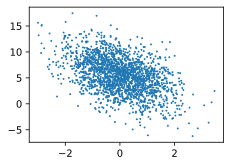

In [143]:
d2l.set_figsize()
d2l.plt.scatter (features[:, (1)].detach().numpy(), labels.detach().numpy(),1)

In [144]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 데이터는 랜덤으로 읽어들임 : index 섞어놓는 방식
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0,num_examples, batch_size):
        batch_indices = torch.tensor( indices[i: min(i + batch_size, num_examples)])# 맨 끝에 batch_size 만큼 안남을수도 있어서
        # if i==0: print(i,'-->',batch_indices)
        yield features[batch_indices], labels[batch_indices]
        # yield: 1초마다 a -> b -> c / return : 3초 뒤에 a,b,c 한꺼번에 출력
        

In [145]:
batch_size = 20 # batch_size개 단위로 데이터를 모델에 넣어줌

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break   # loop 딱 한 번 돌아감 > 


tensor([[-0.6579, -0.4767],
        [-1.2527, -0.3241],
        [ 0.4918, -1.2598],
        [ 0.7480, -1.1352],
        [-0.2498, -0.3664],
        [ 0.1810,  0.7455],
        [ 0.0960,  0.9456],
        [ 1.8656,  1.4686],
        [-1.0067, -2.1673],
        [ 0.6754, -0.2870],
        [ 0.4415, -0.2781],
        [-1.7463, -1.0393],
        [-1.0078,  0.3522],
        [ 0.8278,  0.0780],
        [ 0.8283,  0.6099],
        [-0.0890,  1.8824],
        [ 0.9267, -0.4794],
        [-0.1377,  1.9096],
        [ 1.5071, -0.5089],
        [ 0.0131, -0.7355]]) 
 tensor([[ 4.2476],
        [ 2.2262],
        [ 8.8521],
        [ 9.4312],
        [ 5.3229],
        [ 4.9220],
        [ 4.3677],
        [ 8.8753],
        [ 5.7341],
        [ 7.9483],
        [ 7.2385],
        [ 1.8362],
        [ 1.9463],
        [ 7.8615],
        [ 7.0736],
        [ 2.4136],
        [ 8.9990],
        [ 2.2197],
        [10.7946],
        [ 6.6432]])


In [171]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True) # initializing parameter : gradient descent 하기 위한 첫 위치
b = torch.zeros(1, requires_grad=True)

# requires_grad=True : 모든 연산을 추적해야한다고 알려줘야함

In [131]:
def linreg(X, w, b):
    return torch.matmul(X,w)+b

In [147]:
def squared_loss(y_hat, y):  
    # - log L(y|x) = sigma (log(pdf of normal~) ) = sigma (y-y_hat)**2 / 2*(std**2) + C
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 


In [148]:
# Stochastic Gradient Descent
def sgd(params, lr, batch_size): 
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # loss is calculated as a sum over the minibatch of examples, we normalize by /batch_size
            param.grad.zero_()
       

In [172]:
lr = 0.01
num_epochs =  20 # 전체 데이터가 모델을 통과한 횟수
net = linreg
loss = squared_loss

w_list=[]
mse_list=[]

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b],lr,batch_size) #optim = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
        

epoch 1, loss 2.764849
epoch 2, loss 0.365943
epoch 3, loss 0.048479
epoch 4, loss 0.006461
epoch 5, loss 0.000900
epoch 6, loss 0.000163
epoch 7, loss 0.000065
epoch 8, loss 0.000052
epoch 9, loss 0.000050
epoch 10, loss 0.000050
epoch 11, loss 0.000050
epoch 12, loss 0.000050
epoch 13, loss 0.000050
epoch 14, loss 0.000050
epoch 15, loss 0.000050
epoch 16, loss 0.000050
epoch 17, loss 0.000050
epoch 18, loss 0.000050
epoch 19, loss 0.000050
epoch 20, loss 0.000050


In [160]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-6.8188e-05, -3.2139e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0003], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [161]:
true_w

tensor([ 3.0000, -1.5000])

In [179]:
len(features[:,0].tolist())

2000

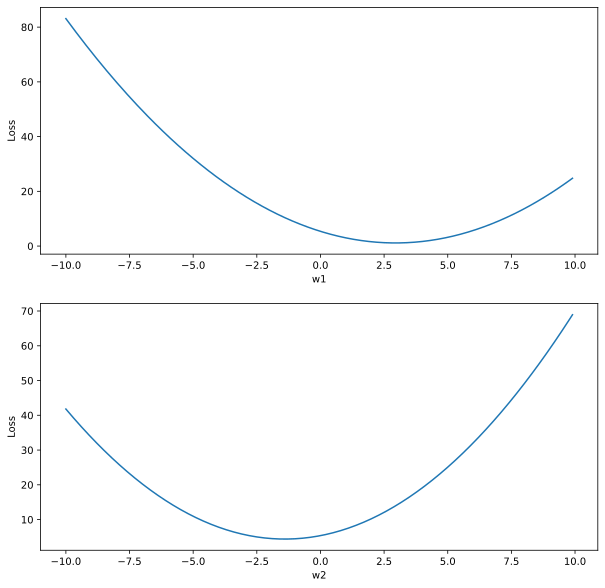

In [205]:
import matplotlib.pyplot as plt
#w1_list=[]
#w2_list=[]
w_list=[]
mse1_list=[]
mse2_list=[]
    
for w in np.arange(-10., 10., 0.1):
    l1_sum=0
    l2_sum=0
    for x1, x2, y in zip(features[:,0],features[:,1], labels):
        l1_sum += loss(np.dot(x1,w)+true_b, y)
        l2_sum += loss(np.dot(x2,w)+true_b, y)
          
    w_list.append(w)
    mse1_list.append(l1_sum/features.shape[0])
    mse2_list.append(l2_sum/features.shape[0])
    

fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(2,1,1)
ax1.plot(w_list, mse1_list)
ax1.set_ylabel('Loss')
ax1.set_xlabel('w1')

ax2 = plt.subplot(2,1,2)
ax2.plot(w_list, mse2_list)
ax2.set_ylabel('Loss')
ax2.set_xlabel('w2')

plt.show()

concise implementation of linear regression 
- api 사용해보기

In [206]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [207]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [175]:
next(iter(data_iter))

[tensor([[ 0.7088, -0.2909],
         [ 0.2533,  0.7769],
         [-0.4902, -0.1119],
         [-0.4511,  0.2152],
         [-0.3111, -1.1882],
         [ 0.8018, -2.1004],
         [ 0.0738,  0.4544],
         [ 0.5868,  1.2293],
         [ 0.7203,  0.0664],
         [-0.6104,  1.5032],
         [-0.1472, -1.7364],
         [ 1.6109,  0.3346],
         [ 0.6542,  0.2753],
         [ 0.4171,  1.6700],
         [-1.8951, -0.1246],
         [ 0.3937,  1.0956],
         [ 1.8586,  0.0830],
         [ 0.7984, -0.5236],
         [-0.6544, -0.2571],
         [-0.9642,  1.9188]]),
 tensor([[ 8.0630e+00],
         [ 5.0658e+00],
         [ 4.1992e+00],
         [ 3.8203e+00],
         [ 6.3564e+00],
         [ 1.1057e+01],
         [ 5.0388e+00],
         [ 5.4081e+00],
         [ 7.5839e+00],
         [ 1.4184e+00],
         [ 7.6680e+00],
         [ 9.8319e+00],
         [ 7.0395e+00],
         [ 4.2412e+00],
         [ 5.7336e-03],
         [ 5.0465e+00],
         [ 1.0957e+01],
         [

In [201]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [208]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [209]:
loss = nn.MSELoss()

In [210]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [211]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000296
epoch 2, loss 0.000100
epoch 3, loss 0.000100


In [212]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0002, -0.0003])
error in estimating b: tensor([0.0001])
